In [1]:
# load data and class label
import numpy as np
import pandas as pd
from pandas import DataFrame


dflabels = pd.read_csv('project_class_labels_300.csv',index_col='Unnamed: 0')
processeddf = pd.read_csv('project_data_down_300.csv',index_col='Unnamed: 0')

In [2]:
# check to see if there is any feature (i.e. column) has all zero values so we will delete them
removedAllZeroColdf = processeddf.loc[:, (processeddf != 0).any(axis=0)]
removedAllZeroColdf.shape

(9900, 20317)

In [3]:
# Feature Selection - Variance Threshold 

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=500000)
reduced = sel.fit_transform(removedAllZeroColdf)
reduceddf = DataFrame(reduced)
reduced.shape

(9900, 6729)

In [4]:
# data scaling
# method 1 : standardization
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
stdscalerfit = stdscaler.fit_transform(removedAllZeroColdf)

stddf = DataFrame(stdscalerfit)
stddf.head()

,0,1,2,3,4,5,6,7,8,9,...,20307,20308,20309,20310,20311,20312,20313,20314,20315,20316
0,-0.17872,0.007263,0.576432,-0.617724,-0.950087,-0.039408,-0.013745,-0.070064,-0.101265,-0.014152,...,2.335216,1.065582,0.338502,0.070045,0.864523,-0.715678,0.841293,2.689865,0.278710,-0.162154
1,-0.17872,-0.714527,-0.329412,-0.506457,0.849333,-0.039408,2.125386,-0.274288,0.225202,-0.014152,...,-0.530446,1.033751,-0.352114,0.247356,-0.955815,-0.685151,-1.069078,-0.775234,-0.010300,-0.162154
2,-0.17872,-0.069212,-0.387740,0.769218,-0.082723,-0.039408,0.248331,1.092781,-0.101265,-0.014152,...,0.143998,0.673286,-0.056255,-0.017657,-0.966170,0.255371,0.474685,-0.847764,-0.286717,-0.162154
3,-0.17872,-0.700030,-0.768504,-0.229050,1.431617,-0.039408,-0.168322,-0.615445,-0.101265,-0.014152,...,-1.284596,-1.034881,-1.108975,-0.079580,-0.815166,-0.252349,-0.685219,-0.976411,-0.288684,-0.162154
4,-0.17872,-0.569570,-0.539865,0.665249,0.309515,-0.039408,-0.206394,0.088578,-0.101265,-0.014152,...,-0.143753,-0.262679,-0.464457,-0.177959,-0.243623,0.550680,-0.192411,-0.904487,-0.261637,-0.162154


In [5]:
from sklearn.preprocessing import label_binarize

y = label_binarize(dflabels, classes=['BRCA','KIRC','LUAD','THCA','HNSC','LUSC','PRAD',
                                      'LGG','SKCM','STAD','BLCA','LIHC','COAD','KIRP',
                                      'CESC','OV','SARC','UCEC','ESCA','PCPG','PAAD',
                                      'GBM', 'LAML', 'TGCT', 'THYM', 'READ', 'KICH', 
                                      'MESO', 'UVM', 'ACC', 'UCS', 'DLBC', 'CHOL'])
n_classes = 33

In [6]:
# split 80% training set; 20% testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reduceddf, y, test_size=0.20)

In [7]:
# svm model - Polynomial kernel function
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


poly_svm_clf = OneVsRestClassifier(svm.SVC(kernel='poly'))
y_score = poly_svm_clf.fit(X_train, y_train).decision_function(X_test)



# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [8]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [9]:
polyfpr = fpr["micro"]

In [10]:
polytpr = tpr["micro"]

In [11]:
polyauc = roc_auc["micro"]

In [12]:
# svc model - Linear SVC (one vs rest)
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


lin_svm_clf = OneVsRestClassifier(svm.LinearSVC())
y_score = lin_svm_clf.fit(X_train, y_train).decision_function(X_test)




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lifpr = fpr["micro"]
litpr = tpr["micro"]
liauc = roc_auc["micro"]

In [13]:
# distance wrighting function; k = 5

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

clf_weighted = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5,weights='distance'))
y_score = clf_weighted.fit(X_train, y_train).predict_proba(X_test)



# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

knnfpr = fpr["micro"]
knntpr = tpr["micro"]
knnauc = roc_auc["micro"]

In [22]:
# ANN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

clf = OneVsRestClassifier(MLPClassifier(activation='relu', alpha=0.0001,
       hidden_layer_sizes=(780,720), learning_rate='constant',
       max_iter=200, random_state=0, solver='adam'))

y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

annfpr = fpr["micro"]
anntpr = tpr["micro"]
annauc = roc_auc["micro"]

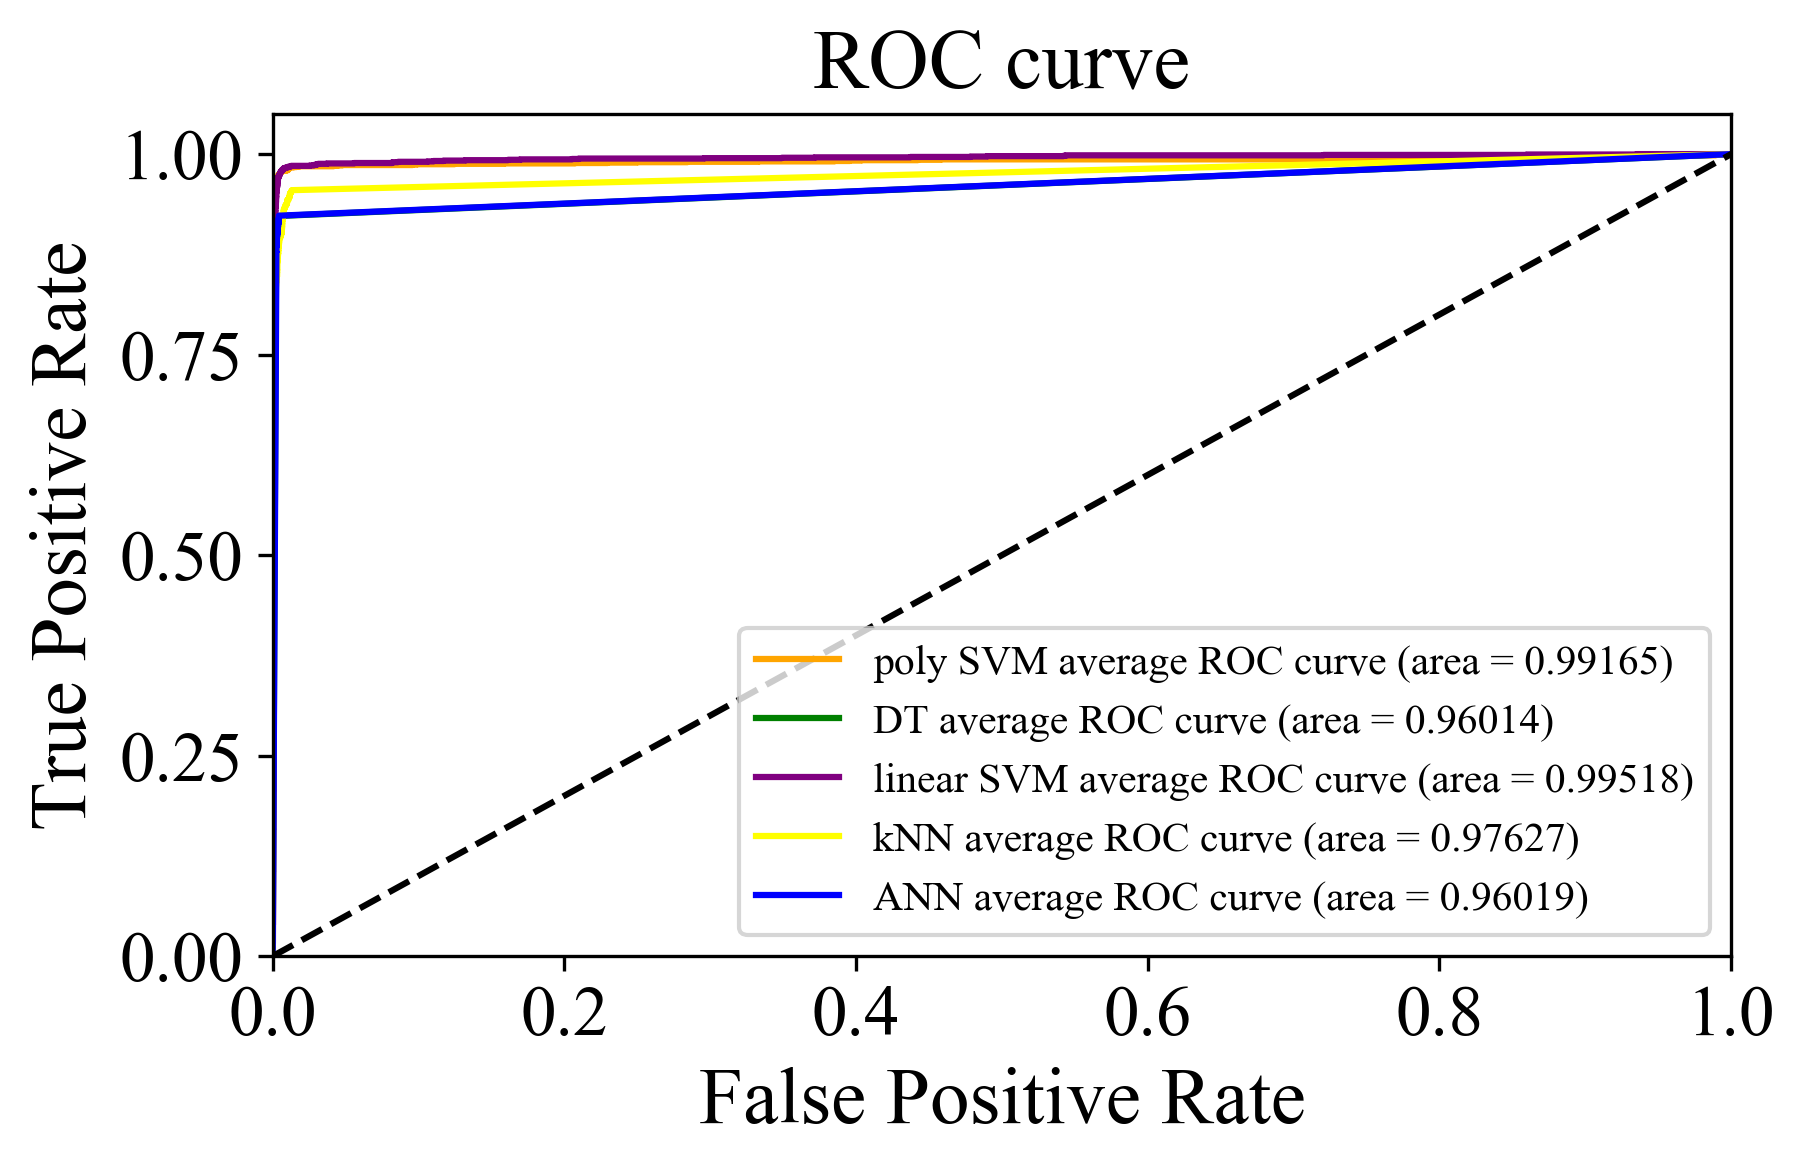

In [24]:
from scipy import interp
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import matplotlib

from PIL import Image
from io import BytesIO

fpr_de = ([ 0.        ,  0.00244634,  1.        ])
tpr_de = ([ 0.        ,  0.92272727,  1.        ])
roc_auc_de = 0.9601404671717173


# Plot all ROC curves
plt.figure(dpi=300)
plt.plot(polyfpr, polytpr,
         label='poly SVM average ROC curve (area = {0:0.5f})'
               ''.format(polyauc),
         color='orange',)

plt.plot(fpr_de, tpr_de,
         label='DT average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc_de),
         color='green',)

plt.plot(lifpr, litpr,
         label='linear SVM average ROC curve (area = {0:0.5f})'
               ''.format(liauc),
         color='purple',)

plt.plot(knnfpr, knntpr,
         label='kNN average ROC curve (area = {0:0.5f})'
               ''.format(knnauc),
         color='yellow',)

plt.plot(annfpr, anntpr,
         label='ANN average ROC curve (area = {0:0.5f})'
               ''.format(annauc),
         color='blue',)

plt.rcParams["font.family"] = "Times New Roman"
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=19, family ="Times New Roman" )
plt.ylabel('True Positive Rate', fontsize=19, family ="Times New Roman")
plt.rc('xtick', labelsize=17)    # fontsize of the tick labels
plt.rc('ytick', labelsize=17)
plt.title('ROC curve', fontsize=20, family ="Times New Roman")
plt.legend(loc="lower right", prop={'family': "Times New Roman"})

plt.tight_layout()


plt.savefig('roccurve.tiff', dpi=300)


png1 = BytesIO()
plt.savefig(png1, format='png')
png2 = Image.open(png1)
png2.save('roccurve.tiff')
png1.close()

plt.show()
